# Выявление профилей потребления клиентов интернет-магазина

Цель - подготовить персонализированные предложения для клиентов для увеличения выручки. Заказчик - менеджер, отвечающий за пользовательский опыт. На основе анализа нужно предложить решения по персонализированным предложениям для повышения выручки.

**Задачи:**

- Провести исследовательский анализ данных;
- Сегментировать покупателей на основе истории их покупок;
- Сформулировать и проверить статистические гипотезы.

**Описание данных:**

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

Колонки в  *ecommerce_dataset.csv* :

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

## Предобработка данных

In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
import scipy.stats as st
import math as mth
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from textwrap import fill

from pymystem3 import Mystem
import nltk

pd.set_option('display.max_colwidth', None)

In [2]:
def read_file(file_name):
    path1 = os.path.join('/datasets', file_name)
    path2 = os.path.join(file_name)
    if os.path.exists(path1):
        df = pd.read_csv(path1)
        return df
    elif os.path.exists(path2):
        df = pd.read_csv(path2,)
        return df
    else:
        print('File is not found')

In [3]:
def initial_analysis(df):
    df.info(),
    display(df.head(10)),
    display(df.describe())

In [4]:
df = read_file('/datasets/ecommerce_dataset.csv')

In [5]:
initial_analysis(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.0


,date,order_id,quantity,price
count,6.737000e+03,6737.000000,6737.000000,6737.000000
mean,2.018855e+09,43128.948345,2.501559,462.028499
std,3.855185e+05,27899.414662,15.266478,871.296064
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019020e+09,14827.000000,1.000000,101.000000
50%,2.019050e+09,68503.000000,1.000000,135.000000
75%,2.019061e+09,70504.000000,1.000000,398.000000
max,2.019103e+09,73164.000000,1000.000000,14917.000000


In [6]:
# проверяем наличие дубликатов
df.duplicated().sum()

0

In [7]:
# преобразование данных о времени
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')

In [8]:
# смотрим на самые большие покупки
df.sort_values(by='quantity', ascending=False).head(5)

,date,customer_id,order_id,product,quantity,price
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Burstenmann, 0522/0000",1000,675.0
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29.0
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,Муляж ЯБЛОКО 9 см красное,170,51.0


**Проверим, все ли заказы являются уникальными**

In [9]:
# строим таблицу с уникальными заказами, числом покупателей и количеством оформлений заказа
orders = (
    df.groupby('order_id')
    .agg({'customer_id': 'nunique', 'date': 'nunique'})
    .rename(columns={'customer_id': 'customers'})
    .reset_index()
)

orders.sort_values(by='customers', ascending=False).head()

,order_id,customers,date
2610,72845,4,4
1914,71480,3,3
902,69485,3,3
817,69310,2,4
1066,69833,2,2


У заказов с одинаковым id может быть несколько покупателей и оформлен он может быть в разные даты. Скорее всего здесь имеет место техническая ошибка, в результате которой неверно генерируется id у некоторых заказов. Проверим количество таких заказов.

In [10]:
bad_orders = orders.query('customers > 1 or date > 1')['order_id']

display('Количество сомнительных заказов:', len(bad_orders))

'Количество сомнительных заказов:'

285

Удалим дублирующиеся заказы, оставив последний по дате заказ.

In [11]:
# получаем пары "номер заказа" - "последняя дата оформления" 
good_orders = (df.query('order_id in @bad_orders')
    .sort_values(by=['order_id', 'date'])
    .groupby(['order_id'])
    .agg({'date': 'last'})
    .astype(str)
)

# преобразуем в словарь
good_orders = dict(zip(list(good_orders.index), list(good_orders['date'])))

In [12]:
# получаем список индексов дублирующихся заказов 
index_names = []
for o, d in good_orders.items():
    index_names.extend(df[(df['order_id'] == o) & (df['date'] != d)].index)
        
len(index_names)

1956

In [13]:
# удаляем дубликаты
df.drop(index_names, inplace = True)

In [14]:
# снова проверяем наличие дубликатов заказов
orders = (
    df.groupby('order_id')
    .agg({'customer_id': 'nunique', 'date': 'nunique'})
    .rename(columns={'customer_id': 'customers'})
    .reset_index()
)

orders.sort_values(by='customers', ascending=False).head()

,order_id,customers,date
1956,71571,2,1
0,12624,1,1
1859,71347,1,1
1851,71330,1,1
1852,71331,1,1


In [15]:
df.query('order_id == 71571')

,date,customer_id,order_id,product,quantity,price
4297,2019-06-02 10:00:00,f1222eaa-d09d-4bff-ab4e-bea6fe3f68a8,71571,"Бегония Элатиор, цвет в ассортименте",1,187.0
4298,2019-06-02 10:00:00,95872093-2887-4ce8-8468-19234990e7d7,71571,"Бегония Элатиор, цвет в ассортименте",1,187.0


Осталось два заказа с одинаковыми датами. Удалим один из заказов.

In [16]:
df = df.query('customer_id != "f1222eaa-d09d-4bff-ab4e-bea6fe3f68a8"')

**Выводы**

Всего 6 колонок, 6737 строк. По типу данных 4 числовых и 2 текстовых колонки. Пропущенные значения отсутствуют. Тип данных в колонке date приведен к datetime.  

- В колонке с количеством товаров в заказе минимум - 1, максимум - 1000, среднее - 2.5.
- В колонке с ценой заказа минимум - 9, максимум - 14917, среднее - 462.

В колонке с количеством товаров в заказе обнаружен выброс - заказ с id 71743 на 1000 вантузов. По информации от тимлида выяснили, что это тестовый заказ. В дальнейшем анализе можно от него избавиться.

Обнаружено большое количество заказов с дублирующимися id. Дубликаты удалены.

## Исследовательский анализ данных

### Профили покупателей

In [17]:
# удаляем тестовый заказ
df = df.query('order_id != 71743')

# посчитаем выручку
df['revenue'] = df['quantity'] * df['price']

# строим таблицу с уникальными покупателями, числом заказов и выручкой
customers = (
    df.groupby('customer_id')
    .agg({'order_id': 'nunique', 'revenue': 'sum'})
    .rename(columns={'order_id': 'orders'})
    .reset_index()
)

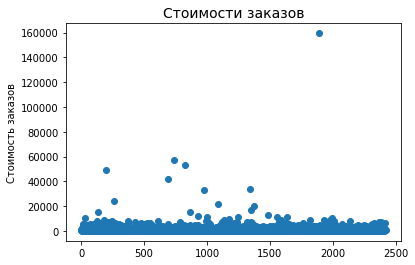

In [18]:
# построим график выручки
x_values = pd.Series(range(0,len(customers['revenue'])))
plt.scatter(x_values, customers['revenue'])

plt.ylabel('Стоимость заказов')
plt.title('Стоимости заказов', fontsize=14)
plt.show()

In [19]:
# рассчитаем 95 и 99 перцентили суммарной выручки на пользователя
np.percentile(customers['revenue'], [95, 99])

array([4139.  , 8754.01])

In [20]:
# узнаем мин. и макс. дату покупки
display(df['date'].min().isoformat())
df['date'].max().isoformat()

'2018-10-01T00:00:00'

'2019-10-31T16:00:00'

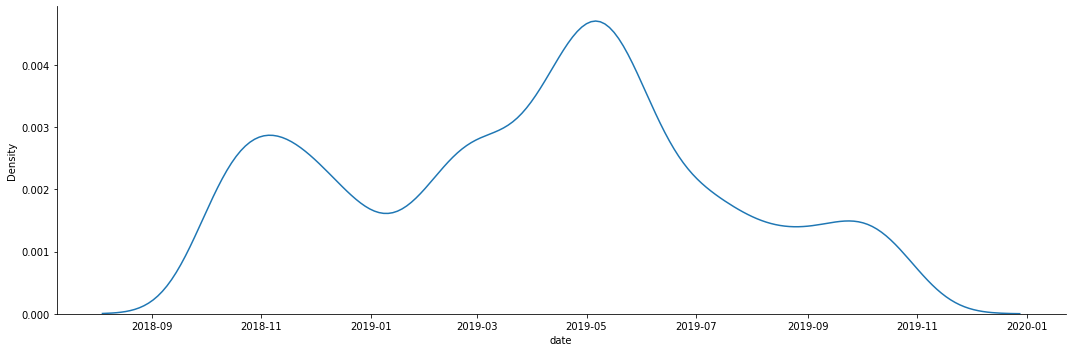

In [21]:
# построим график количества заказанных товаров  за всё время 
sns.displot(df, x='date', kind='kde', aspect=3/1)

### Основные метрики

In [22]:
# посчитаем количество покупателей, заказов, средний чек, суммарную выручку и среднюю выручку с покупателя

display('Количество покупателей:', len(customers),
        'Количество заказов:', customers['orders'].sum(),
        'Суммарная выручка:', customers['revenue'].sum(),
        'Средний чек:', customers['revenue'].sum() / customers['orders'].sum(),
        'Средняя выручка с покупателя:', customers['revenue'].mean()
)

'Количество покупателей:'

2420

'Количество заказов:'

2783

'Суммарная выручка:'

3413503.0

'Средний чек:'

1226.5551563061445

'Средняя выручка с покупателя:'

1410.5384297520661

In [23]:
# посмотрим на самые популярные товары
products_prof = (
    df.groupby('product')
    .agg({'product': 'count', 'revenue': 'sum'})
    .rename(columns={'product': 'count'})
    .reset_index()
)

products_top_count = products_prof.sort_values(by='count', ascending=False).head(10)
products_top_rev = products_prof.sort_values(by='revenue', ascending=False).head(10)

In [24]:
products_top_count

,product,count,revenue
1034,Пеларгония розебудная Red Pandora укорененный черенок,65,10923.0
1032,Пеларгония розебудная Prins Nikolai укорененный черенок,55,8358.0
1009,Пеларгония зональная диам. 12 см сиреневый полумахровый,52,10780.0
1609,Сумка-тележка 2-х колесная Gimi Argo синяя,47,50405.0
1031,Пеларгония розебудная Mary укорененный черенок,39,6336.0
1033,Пеларгония розебудная Queen Ingrid укорененный черенок,30,5175.0
1030,Пеларгония розебудная Margaretha укорененный черенок,29,6078.0
987,Пеларгония зональная Ринго Вайт d-7 см h-10 см укорененный черенок,24,1998.0
1017,Пеларгония зональная махровая лососевая,24,6537.0
990,Пеларгония зональная диам. 12 см коралловая полумахровая,24,4658.0


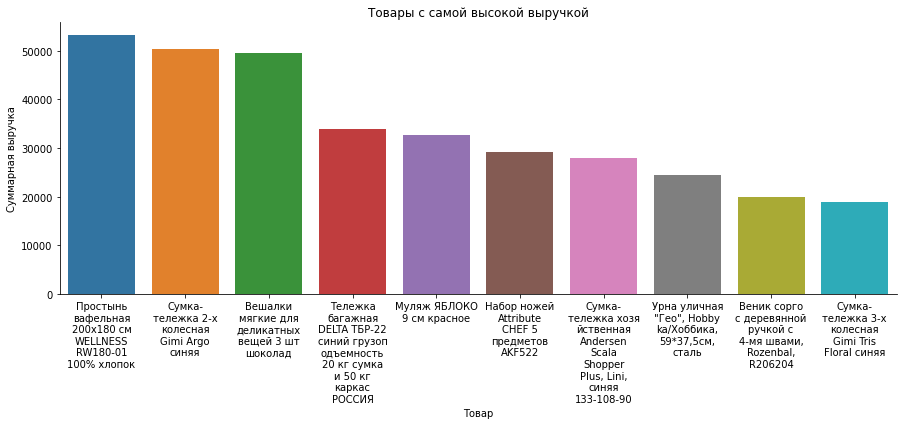

In [25]:
plt.figure(figsize=(15, 5))

f = sns.barplot(data=products_top_rev, x=[fill(l, 12) for l in products_top_rev['product']], y='revenue')
sns.despine()
f.set_title('Товары с самой высокой выручкой')
f.set_xlabel('Товар')
f.set_ylabel('Суммарная выручка')

plt.show()

**Выводы**

- Количество покупателей: 2420
- Количество заказов: 2783
- Суммарная выручка: 3413503
- Средний чек: 1226
- Средняя выручка с покупателя: 1410

Анализ профилей покупателей показал наличие аномально высоких сумм выручки у некоторых покупателей. Вероятно это не ошибки, а крупные покупатели, которые генерируют большую выручку и которых следует выделить в отдельный сегмент. Расчет перцентилей по выручке показал, что не более 5 % покупателей потратили более 4139, и не более 1 % покупателей потратили более 8754. В качестве границы выберем выручку более 9000.

Анализ распределения заказов по датам показал наличие роста числа заказов в период с мая по июнь. Возможно это связано с покупкой сезонных товаров.

Самые продаваемые товары - цветы. Товары с самой большой выручкой - простынь, сумка-тележка и вешалки.

## Сегментация покупателей

### Выделение аномальных покупателей

In [26]:
big_custs_id = customers.query('revenue > 9000')['customer_id']
big_custs = df.query('customer_id in @big_custs_id')

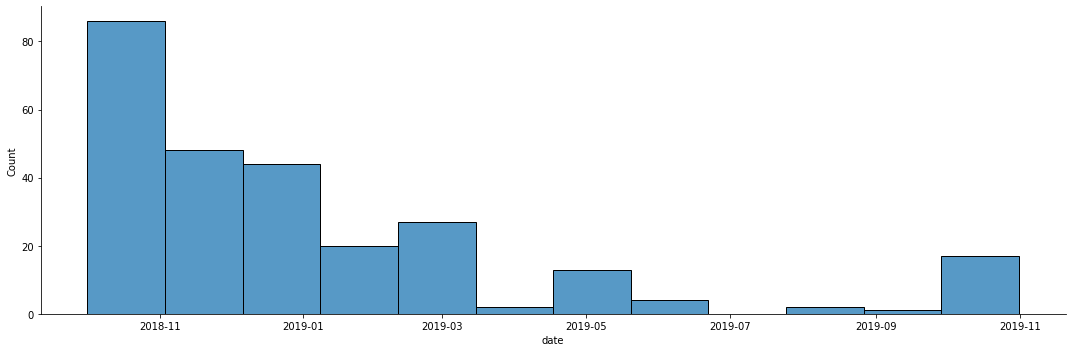

In [27]:
sns.displot(big_custs, x='date', aspect=3/1)

Аномальные покупатели делают покупки только в определенный сезон, тогда как остальные совершают покупки более равномерно.

### Сегментрование товаров по категориям

In [28]:
# выделим названия товаров в отдельную колонку
df[['product_1', 'product_2', 'product_3']] = df['product'].str.split(' ', 2, expand=True)
df = df.drop(['product_2', 'product_3'], axis=1)
df.head()

,date,customer_id,order_id,product,quantity,price,revenue,product_1
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,Комнатное
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,194.0,Комнатное
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,Радермахера
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,Хризолидокарпус
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,Циперус


In [29]:
df.groupby('product_1').agg({'revenue': 'sum'}).sort_values(by='revenue', ascending=False).head(150).index

Index(['Сумка-тележка', 'Сушилка', 'Гладильная', 'Пеларгония', 'Коврик',
       'Тележка', 'Штора', 'Набор', 'Муляж', 'Стремянка',
       ...
       'Мантоварка-пароварка', 'Щетка-утюжок', 'Вилка', 'Утюг', 'Нетканые',
       'Фал', 'Вербена', 'Лобелия', 'Стакан', 'Двуспальное'],
      dtype='object', name='product_1', length=150)

In [30]:
# распределим 150 наиболее прибыльных товаров по 4 категориям

products = [
    ('Сумка-тележка', 'товары для дома'),
    ('Сушилка', 'товары для дома'),
    ('Гладильная', 'товары для дома'),
    ('Пеларгония', 'сад и огород'),
    ('Коврик', 'текстиль'),
    ('Тележка', 'товары для дома'),
    ('Штора', 'текстиль'),
    ('Набор', 'посуда'),
    ('Муляж', 'товары для дома'),
    ('Стремянка', 'товары для дома'),
    ('Скатерть', 'текстиль'),
    ('Рассада', 'сад и огород'),
    ('Полки', 'товары для дома'),
    ('Чехол', 'текстиль'), 
    ('Простынь', 'текстиль'),
    ('Вешалки', 'товары для дома'), 
    ('Вешалка', 'товары для дома'), 
    ('Урна', 'товары для дома'),
    ('Тарелка', 'посуда'),
    ('Таз', 'товары для дома'),
    ('Петуния', 'сад и огород'),
    ('Корзина', 'товары для дома'),
    ('Салфетка', 'текстиль'), 
    ('Мусорный', 'товары для дома'),
    ('Одеяло', 'текстиль'),
    ('Подвесное', 'товары для дома'), 
    ('Веник', 'товары для дома'), 
    ('Спатифиллум', 'сад и огород'), 
    ('Швабра', 'товары для дома'), 
    ('Щетка', 'товары для дома'),
    ('Роза', 'сад и огород'), 
    ('Герань', 'сад и огород'),
    ('Стремянки', 'товары для дома'),
    ('Ведро', 'товары для дома'), 
    ('Лестница-стремянка', 'товары для дома'),
    ('Новогоднее', 'товары для дома'),
    ('Чайник', 'посуда'), 
    ('Контейнер', 'товары для дома'), 
    ('Наматрацник', 'текстиль'), 
    ('Покрывало', 'текстиль'),
    ('Однолетнее', 'сад и огород'),
    ('Искусственный', 'товары для дома'), 
    ('Эвкалипт', 'сад и огород'),
    ('Карниз', 'товары для дома'), 
    ('Декоративная', 'товары для дома'),
    ('Комплект постельного', 'текстиль'),
    ('Комплект для', 'товары для дома'), 
    ('Комплект махровых', 'текстиль'),
    ('Банка', 'посуда'), 
    ('томата', 'сад и огород'),
    ('Сиденье', 'товары для дома'),
    ('Tepмокружка', 'посуда'),
    ('Корыто', 'товары для дома'),
    ('Кружка', 'посуда'),
    ('Весы',  'товары для дома'),
    ('Цветок', 'сад и огород'),
    ('Кастрюля', 'посуда'), 
    ('Ковер', 'текстиль'), 
    ('Сковорода', 'посуда'), 
    ('Чайный', 'посуда'),
    ('Штанга', 'товары для дома'),
    ('Щетка-сметка', 'товары для дома'),
    ('Ёрш', 'товары для дома'),
    ('Урна-пепельница', 'товары для дома'), 
    ('Кофр', 'товары для дома'),
    ('Автоматическая', 'товары для дома'),
    ('Нож', 'посуда'), 
    ('Крючок', 'товары для дома'), 
    ('Емкость', 'посуда'),
    ('Антуриум', 'сад и огород'),
    ('Салатник', 'посуда'),
    ('Ручка-скоба', 'товары для дома'), 
    ('Модульная', 'товары для дома'),
    ('Пружина', 'товары для дома'),
    ('Паста', 'товары для дома'),
    ('Стремянка-табурет', 'товары для дома'),
    ('Вешалка-стойка', 'товары для дома'),
    ('Ерш', 'товары для дома'),
    ('Полка', 'товары для дома'), 
    ('Крепеж', 'товары для дома'), 
    ('Комод', 'товары для дома'), 
    ('Ткань', 'текстиль'),
    ('Подарочный', 'товары для дома'),
    ('Сумка', 'товары для дома'),
    ('Калибрахоа', 'сад и огород'),
    ('Покрытие', 'товары для дома'),
    ('Перчатки', 'товары для дома'),
    ('Гортензия', 'сад и огород'),
    ('Ковш', 'посуда'), 
    ('Стеллаж', 'товары для дома'), 
    ('Подрукавник', 'товары для дома'),
    ('Этажерка', 'товары для дома'),
    ('Шпингалет', 'товары для дома'),
    ('Складная', 'товары для дома'),
    ('Пылесос', 'товары для дома'),
    ('Термокружка', 'посуда'),
    ('Мединилла', 'сад и огород'),
    ('Циперус', 'сад и огород'),
    ('Настенная', 'товары для дома'),
    ('Афеляндра', 'сад и огород'),
    ('Газания', 'сад и огород'),
    ('Бегония', 'сад и огород'),
    ('Бакопа', 'сад и огород'), 
    ('Лоток', 'посуда'),  
    ('Петля', 'товары для дома'), 
    ('Комнатное', 'сад и огород'),
    ('Бак ', 'товары для дома'), 
    ('Плед', 'текстиль'),
    ('Универсальный', 'посуда'),  
    ('Простыня', 'текстиль'), 
    ('Эпипремнум', 'сад и огород'), 
    ('Тимьян', 'сад и огород'), 
    ('Вешалка-плечики', 'товары для дома'),
    ('Доска', 'посуда'), 
    ('Хлебница', 'посуда'), 
    ('Сметка', 'товары для дома'),
    ('Плечики', 'товары для дома'), 
    ('Соковарка', 'посуда'), 
    ('Пуансеттия', 'сад и огород'),
    ('Измельчитель',  'посуда'),
    ('Фиалка', 'сад и огород'), 
    ('Окномойка', 'товары для дома'),
    ('Термос', 'посуда'), 
    ('Ложка', 'посуда'),  
    ('Примула', 'сад и огород'),
    ('Корзинка', 'посуда'), 
    ('Цитрофортунелла', 'сад и огород'),
    ('Наматрасник', 'текстиль'),
    ('Дендробиум', 'сад и огород'), 
    ('Фуксия', 'сад и огород'),
    ('Котел', 'посуда'), 
    ('Фаленопсис', 'сад и огород'), 
    ('Цикламен', 'сад и огород'), 
    ('Насадка', 'товары для дома'), 
    ('Столовый', 'посуда'), 
    ('Коробка', 'товары для дома'),
    ('Ящик', 'товары для дома'), 
    ('Миксер', 'посуда'), 
    ('Подставка', 'товары для дома'), 
    ('Эхинокактус', 'сад и огород'),
    ('Искусственная', 'товары для дома'),
    ('Гвоздика', 'сад и огород'),
    ('Мантоварка-пароварка', 'посуда'), 
    ('Щетка-утюжок', 'товары для дома'),
    ('Вилка', 'посуда'),  
    ('Утюг', 'товары для дома'),
    ('Нетканые', 'текстиль'), 
    ('Фал ', 'товары для дома'),
    ('Вербена', 'сад и огород'), 
    ('Лобелия', 'сад и огород'),
    ('Стакан', 'посуда'), 
]

for p in products:
    df.loc[df['product'].str.contains(p[0]), 'product_type'] = p[1]
    
df['product_type'].value_counts()

сад и огород       2023
товары для дома    1468
текстиль            339
посуда              257
Name: product_type, dtype: int64

In [31]:
# посчитаем, сколько товаров остались без категории

products = df.groupby('product').agg({'product_type': 'first', 'revenue': 'sum'})
display('Всего уникальных товаров:', len(products),
        'Доля товаров без категории:', products['product_type'].isna().sum() / len(products) * 100,
        'Доля выручки товаров без категории:', products[products['product_type'].isna()]['revenue'].sum() / products['revenue'].sum() * 100
)

'Всего уникальных товаров:'

2332

'Доля товаров без категории:'

22.341337907375642

'Доля выручки товаров без категории:'

4.731034365576946

### Анализ сегментов

In [32]:
# разделим датасет на части, по сегментам покупок

df_garden = df.query('product_type == "сад и огород"')
df_house = df.query('product_type == "товары для дома"')
df_textile = df.query('product_type == "текстиль"')
df_dishes = df.query('product_type == "посуда"')

# подсчитаем объемы полученных выборок
display(
    'Количество покупателей категории сад и огород', df_garden['customer_id'].nunique(),
    'Количество покупателей категории товары для дома', df_house['customer_id'].nunique(),
    'Количество покупателей категории текстиль', df_textile['customer_id'].nunique(),
    'Количество покупателей категории посуда', df_dishes['customer_id'].nunique(),
)

'Количество покупателей категории сад и огород'

550

'Количество покупателей категории товары для дома'

1169

'Количество покупателей категории текстиль'

279

'Количество покупателей категории посуда'

196

In [33]:
# подсчитаем суммарную выручку, средний чек и частоту покупок по категориям

prod = (
    df.groupby('product_type')
    .agg({'customer_id': 'nunique', 'order_id': 'nunique', 'revenue': 'sum'})
    .rename(columns={'order_id': 'orders', 'customer_id': 'customers'})
    .reset_index()
)

prod['avg'] = prod['revenue'] / prod['orders']
prod['freq'] = prod['orders'] / prod['customers']

prod

,product_type,customers,orders,revenue,avg,freq
0,посуда,196,212,257175.0,1213.089623,1.081633
1,сад и огород,550,629,420109.0,667.899841,1.143636
2,текстиль,279,319,494352.0,1549.692790,1.143369
3,товары для дома,1169,1334,2080373.0,1559.500000,1.141146


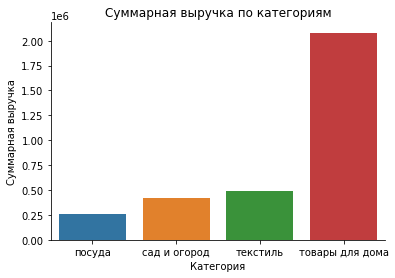

In [34]:
# построим график суммарной выручки по категориям

f = sns.barplot(data=prod, x='product_type', y='revenue')
sns.despine()
f.set_title('Суммарная выручка по категориям')
f.set_ylabel('Суммарная выручка')
f.set_xlabel('Категория')
plt.show()

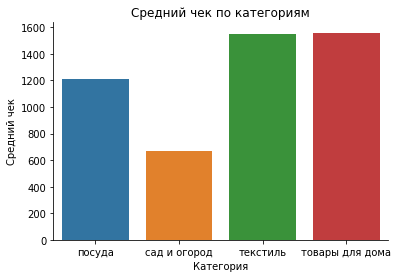

In [35]:
# построим график среднего чека по категориям


f = sns.barplot(data=prod, x='product_type', y='avg')
sns.despine()
f.set_title('Средний чек по категориям')
f.set_ylabel('Средний чек')
f.set_xlabel('Категория')
plt.show()

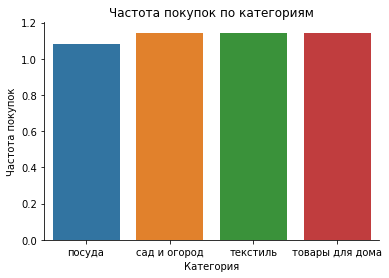

In [36]:
# построим график частоты покупок по категориям

f = sns.barplot(data=prod, x='product_type', y='freq')
sns.despine()
f.set_title('Частота покупок по категориям')
f.set_ylabel('Частота покупок')
f.set_xlabel('Категория')
plt.show()

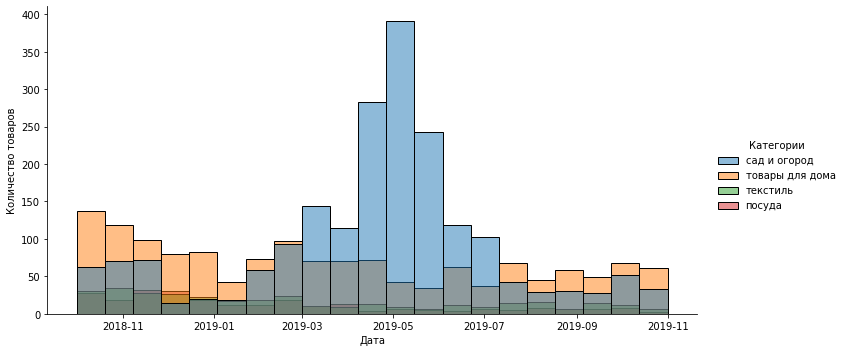

In [37]:
# построим график количества заказанных товаров по категориям
f = sns.displot(df, x='date', hue='product_type', aspect=2/1)
f.set_axis_labels('Дата', 'Количество товаров')
f.legend.set_title('Категории')
plt.show()

**Выводы**

- Проведена сегментация товаров на 4 категории: сад и огород, товары для дома, текстиль, посуда. Остались нераспределенными около 22% товаров, которые составляют менее 5% выручки.

- По количеству покупателей, суммарной выручке и среднему чеку лидирует категория "товары для дома".

- Частота покупок примерно одинаковая для всех, незначительно отстает "посуда".

- Наибольшее количество товаров заказывают в категории "сад и огород" в летний сезон.


## Проверка гипотез

### Cредняя цена заказов покупателей в категориях "Сад и огород" и "Товары для дома" различается

Сформулируем гипотезу. За нулевую гипотезу примем утверждение о том, что средняя цена заказов покупателей «Сад и огород» равна средней цене заказов «Товары для дома». Альтернативной гипотезой будет утверждение о том, что средние цены в категориях не равны. Будем использовать специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам `ttest_ind`. Так как мы знаем, что выборки разного размера (1237 против 726 покупок), укажем в параметре `equal_var` значение `False`. Критический уровень статистической значимости установим в 5 %.

In [38]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    df_garden['revenue'], 
    df_house['revenue'], equal_var=False)

display('Средняя цена заказов покупателей «Сад и огород»:',  df_garden['revenue'].mean())
display('Средняя цена заказов покупателей «Товары для дома»:',  df_house['revenue'].mean())
display('p-значение:', results.pvalue)

if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу") 

'Средняя цена заказов покупателей «Сад и огород»:'

207.66633712308453

'Средняя цена заказов покупателей «Товары для дома»:'

1417.1478201634877

'p-значение:'

4.374185142425154e-80

'Отвергаем нулевую гипотезу'

**Вывод**

Так как нулевая гипотеза отвергнута, мы принимаем альтернативную гипотезу -  средняя цена заказов покупателей «Сад и огород» и «Товары для дома» различается. Сильное различие в средних подсказывает, в какую стророну направлено различие - среднее «Товары для дома» больше.

### Cредняя частота заказов покупателей в категориях "Сад и огород" и "Товары для дома" различается

Сформулируем гипотезу. За нулевую гипотезу примем утверждение о том, что средняя частота заказов покупателей «Сад и огород» равна средней частоте заказов «Товары для дома». Альтернативной гипотезой будет утверждение о том, что средние частоты в категориях не равны. Параметры проверки аналогичны предыдущим.

In [39]:
# готовим выборки
garden_customers = (
    df_garden.groupby('customer_id')
    .agg({'order_id': 'nunique'})
    .rename(columns={'order_id': 'orders'})
    .reset_index()
)

house_customers = (
    df_house.groupby('customer_id')
    .agg({'order_id': 'nunique'})
    .rename(columns={'order_id': 'orders'})
    .reset_index()
)

In [40]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    garden_customers['orders'], 
    house_customers['orders'], equal_var=False)

display('Средняя частота заказов покупателей «Сад и огород»:',  garden_customers['orders'].mean())
display('Средняя частота заказов покупателей «Товары для дома»:',  house_customers['orders'].mean())
display('p-значение:', results.pvalue)

if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу") 

'Средняя частота заказов покупателей «Сад и огород»:'

1.1436363636363636

'Средняя частота заказов покупателей «Товары для дома»:'

1.1411462788708298

'p-значение:'

0.9721889137816904

'Не получилось отвергнуть нулевую гипотезу'

**Вывод**

Нулевая гипотеза не отвергнута, средняя частота заказов покупателей «Сад и огород» не имеет статистически значимой разницы со  средней частотой заказов «Товары для дома».

### Cредний чек заказов покупателей в категории "Сад и огород" в зимний и летний период различается

Сформулируем гипотезу. За нулевую гипотезу примем утверждение о том, что средняя цена заказов покупателей «Сад и огород» в зимний период равна средней цене заказов в летний период. Альтернативной гипотезой будет утверждение о том, что средние цены в разные периоды не равны. За зимний период возьмем 5 месяцев с октября 2018 по февраль 2019, за летний период - 5 месяцев с марта 2019 по июль 2019. Будем использовать специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам `ttest_ind`. Так как мы знаем, что выборки разного размера, укажем в параметре `equal_var` значение `False`. Критический уровень статистической значимости установим в 5 %.

In [41]:
# объявим функцию для определения периода
def season_detection(date):
    if date < pd.Timestamp('2019-03-01 00:00:00'):
        return 'winter'
    if pd.Timestamp('2019-03-01 00:00:00') < date < pd.Timestamp('2019-08-01 00:00:00'):
        return 'summer'
    return 'other'

season_detection(pd.Timestamp('2019-09-01 00:00:00'))

'other'

In [42]:
# добавляем информацию о периоде
df_garden['season'] = df_garden['date'].apply(season_detection)

/tmp/ipykernel_145/1134009872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_garden['season'] = df_garden['date'].apply(season_detection)


In [43]:
# группируем данные по покупателям и периодам
df_garden_seasons = (
    df_garden.groupby(by=['customer_id', 'season'], dropna=False)
    .agg({'order_id': 'nunique', 'revenue': 'sum'})
    .rename(columns={'order_id': 'orders'})
    .reset_index()
)

df_garden_seasons['avg_bill'] = df_garden_seasons['revenue'] / df_garden_seasons['orders']

# выделяем зимних покупателей
garden_winter = df_garden_seasons.query('season == "winter"')
winter = list(garden_winter['customer_id'])

# выделяем летних покупателей
garden_summer = df_garden_seasons.query('season == "summer"')

# проверяем пересечения между выборками
garden_summer.query('customer_id in @winter')

,customer_id,season,orders,revenue,avg_bill
402,b7b865ab-0735-407f-8d0c-31f74d2806cc,summer,4,2862.0,715.5
434,c971fb21-d54c-4134-938f-16b62ee86d3b,summer,2,804.0,402.0
508,eb6521ae-56e3-4a72-9ea2-e9c69701ff3f,summer,1,698.0,698.0


Всего 3 покупателя делали покупки и летом и зимой, удалим их.

In [44]:
all_seasons_cust = [
    'b7b865ab-0735-407f-8d0c-31f74d2806cc',
    'c971fb21-d54c-4134-938f-16b62ee86d3b',
    'eb6521ae-56e3-4a72-9ea2-e9c69701ff3f'
]

garden_winter = garden_winter.query('customer_id not in @all_seasons_cust')
garden_summer = garden_summer.query('customer_id not in @all_seasons_cust')

In [45]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    garden_winter['avg_bill'], 
    garden_summer['avg_bill'], equal_var=False)

display('Средняя цена заказов зимних покупателей «Сад и огород»:',  garden_winter['avg_bill'].mean())
display('Средняя цена заказов летних покупателей «Сад и огород»:',  garden_summer['avg_bill'].mean())
display('p-значение:', results.pvalue)

if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу") 

'Средняя цена заказов зимних покупателей «Сад и огород»:'

609.3807947019867

'Средняя цена заказов летних покупателей «Сад и огород»:'

793.2483108108108

'p-значение:'

0.05646475273191859

'Не получилось отвергнуть нулевую гипотезу'

**Вывод**

Нулевая гипотеза не отвергнута - средняя цена заказов покупателей «Сад и огород» в зимний период не имеет статистически значимого различия со средней ценой заказов в летний период.

### Cредняя частота заказов покупателей в категории "Сад и огород" в зимний и летний период различается

Сформулируем гипотезу. За нулевую гипотезу примем утверждение о том, что средняя частота заказов покупателей «Сад и огород» зимний период равна средней частоте заказов в летний период. Альтернативной гипотезой будет утверждение о том, что средние частоты в периодах не равны. Параметры проверки аналогичны предыдущим.

In [46]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    garden_winter['orders'], 
    garden_summer['orders'], equal_var=False)

display('Средняя частота заказов зимних покупателей «Сад и огород»:',  garden_winter['orders'].mean())
display('Средняя частота заказов летних покупателей «Сад и огород»:',  garden_summer['orders'].mean())
display('p-значение:', results.pvalue)

if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу") 

'Средняя частота заказов зимних покупателей «Сад и огород»:'

1.0728476821192052

'Средняя частота заказов летних покупателей «Сад и огород»:'

1.1114864864864864

'p-значение:'

0.24543285595368367

'Не получилось отвергнуть нулевую гипотезу'

**Вывод**

Нулевая гипотеза не отвергнута - средняя частота заказов покупателей «Сад и огород» в зимний период не имеет статистически значимого различия со средней частотой заказов в летний период.

## Подготовка персонализированных предложений

### Крупные покупатели
Посмотрим, что заказывают крупные покупатели 

In [47]:
big_custs = df.query('customer_id in @big_custs_id')

big_prod = (
    big_custs.groupby('product_type')
    .agg({'customer_id': 'nunique', 'order_id': 'nunique', 'revenue': 'sum'})
    .rename(columns={'order_id': 'orders', 'customer_id': 'customers'})
    .reset_index()
)

big_prod

,product_type,customers,orders,revenue
0,посуда,5,12,45552.0
1,сад и огород,4,17,17642.0
2,текстиль,7,39,152057.0
3,товары для дома,19,131,425154.0


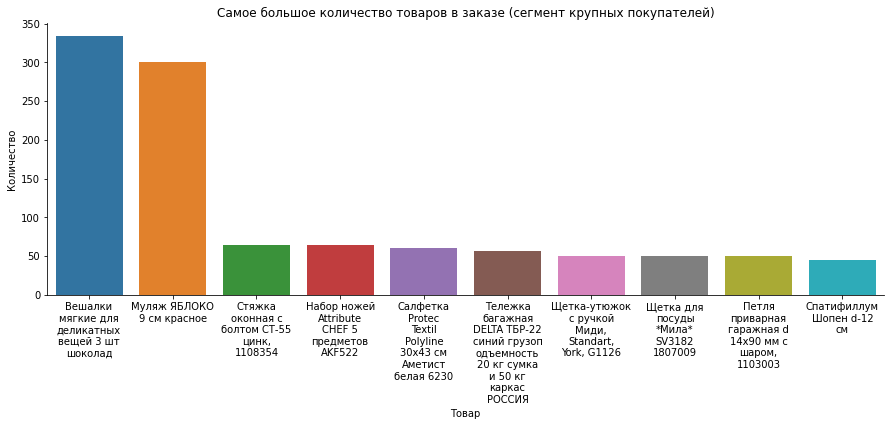

In [48]:
big_prods_top_q = big_custs.sort_values(by='quantity', ascending=False).head(10)

plt.figure(figsize=(15, 5))

f = sns.barplot(data=big_prods_top_q, x=[fill(l, 12) for l in big_prods_top_q['product']], y='quantity')
sns.despine()
f.set_title('Самое большое количество товаров в заказе (сегмент крупных покупателей)')
f.set_xlabel('Товар')
f.set_ylabel('Количество')

plt.show()

Как мы видим, крупные покупатели заказывают в больших количествах такие товары как вешалки и тележки, что говорит о том, что скорее всего они приобретаются для дальнейшей перепродажи. Такие покупатели приносят большой доход, поэтому нужно стараться их удерживать и привлекать новых. В качестве персонального предлложения для этого сегмента можно давать скидку при покупке определенного количества товара. Например, скидка 10% при покупке более 5 тележек.  

### Летние и зимние покупатели в категории "сад и огород" 

Проверим их различия.

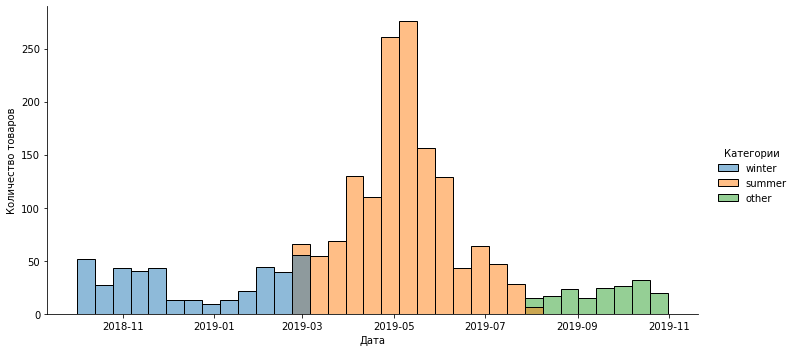

In [49]:
# построим график количества заказанных товаров по категориям
f = sns.displot(df_garden, x='date', hue='season', aspect=2/1)
f.set_axis_labels('Дата', 'Количество товаров')
f.legend.set_title('Категории')
plt.show()

In [50]:
seasonal = (
    df_garden.query('season != "other"')
    .groupby('season')
    .agg({'customer_id': 'nunique', 'order_id': 'nunique', 'revenue': 'sum'})
    .rename(columns={'order_id': 'orders', 'customer_id': 'customers'})
    .reset_index()
)

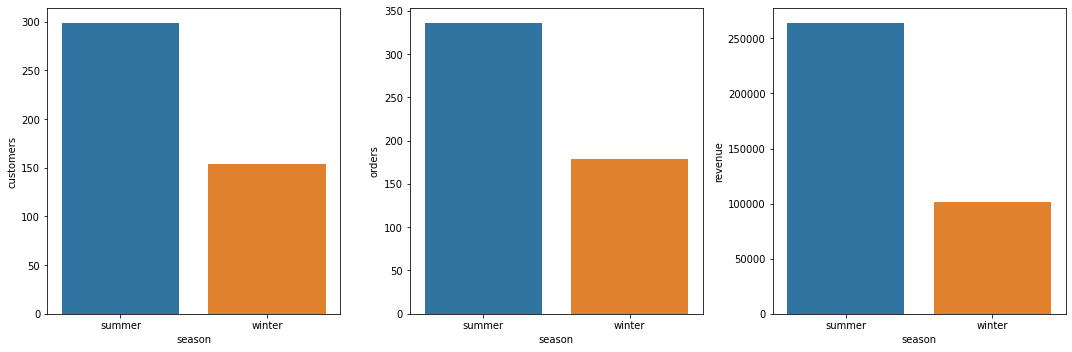

In [51]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(['customers', 'orders', 'revenue']):
    sns.barplot(
        data=seasonal,
        x='season',
        y=col,
        ax=plt.subplot(1, 3, i + 1)
    )

plt.tight_layout()
plt.show() 

В летний период наблюдается наплыв покупателей, их количество вырастает в два раза. При этом мы уже выяснили, что средний чек и частота покупок не зависят от сезона и остаются стабильными. Необходимо повышать средний чек у летних покупателей. Например, проводить распродажи в летний сезон, давать скидку при покупке нескольких товаров. 

## Общий вывод

По результатам исследования можно сделать следующие выводы:

- Количество покупателей: 2420
- Количество заказов: 2783
- Суммарная выручка: 3413503
- Средний чек: 1226
- Средняя выручка с покупателя: 1410
- Анализ распределения заказов по датам показал наличие роста числа заказанных товаров в период с мая по июнь. Это связано с покупкой сезонных товаров в категории сад и огород.
- Самые продаваемые товары - цветы. 
- Товары с самой большой выручкой - простынь, сумка-тележка и вешалки.
- Проведена сегментация товаров на 4 категории: сад и огород, товары для дома, текстиль, посуда.
- По количеству покупателей и суммарной выручке лидирует категория "товары для дома".
- Самый низкий средний чек в категории «сад и огород».
- Частота покупок у всех категорий примерно одинакова.
- Средняя цена заказов покупателей в категории «Товары для дома» больше, чем  в категории «Сад и огород»
- Средняя цена и частота заказов покупателей категории «Сад и огород» в зимний и летний период не имеют статистической значимого различия.

В качестве персонального предлложения для сегмента крупных покупателей можно давать скидку при покупке больших объемов товара. Например, скидка 10% при покупке более 5 тележек. 

Необходимо повышать средний чек у летних покупателей, проводить распродажи в летний сезон, давать скидку при покупке нескольких товаров. 

Презентация: <https://drive.google.com/file/d/1-f9k6Z_f4p9_l3v0ygMuopxfurDJqDOI/view?usp=sharing>